In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import scanpy as sc
import squidpy as sq
import anndata as ad
import scipy as sp

In [2]:
adata = sc.read_h5ad('../../data/from_spatial_omics/STARmap/STARmap_Wang2018three_data_2D_zstep10_0_data.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 2764 × 28
    obs: 'x', 'y', 'z', 'n_counts', 'leiden'
    uns: 'leiden', 'leiden_colors', 'moranI', 'neighbors', 'spatial_neighbors', 'umap'
    obsm: 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [4]:
adata.X.todense()

matrix([[   930.,    349.,   5073., ...,  20941., 187343., 180822.],
        [ 30967.,    571.,    555., ...,   8198.,  33515.,   9260.],
        [ 27142.,   3182.,  48825., ...,   5006.,  53487.,  12058.],
        ...,
        [110883.,   3328.,   1739., ...,  29343.,  23551.,   7241.],
        [ 29885.,   1148.,   7505., ...,  24389.,  12885.,   6901.],
        [ 89956.,   2319.,    783., ...,  28940.,  13337.,   3034.]],
       dtype=float32)

In [5]:
sc.pp.calculate_qc_metrics(adata, inplace=True, percent_top=[10])

In [6]:
adata.layers['counts'] = adata.X.copy()

In [7]:
# sc.pp.filter_cells(adata, min_genes=10)
# sc.pp.filter_genes(adata, min_cells=500)

In [8]:
adata

AnnData object with n_obs × n_vars = 2764 × 28
    obs: 'x', 'y', 'z', 'n_counts', 'leiden', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'leiden', 'leiden_colors', 'moranI', 'neighbors', 'spatial_neighbors', 'umap'
    obsm: 'X_umap', 'spatial'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

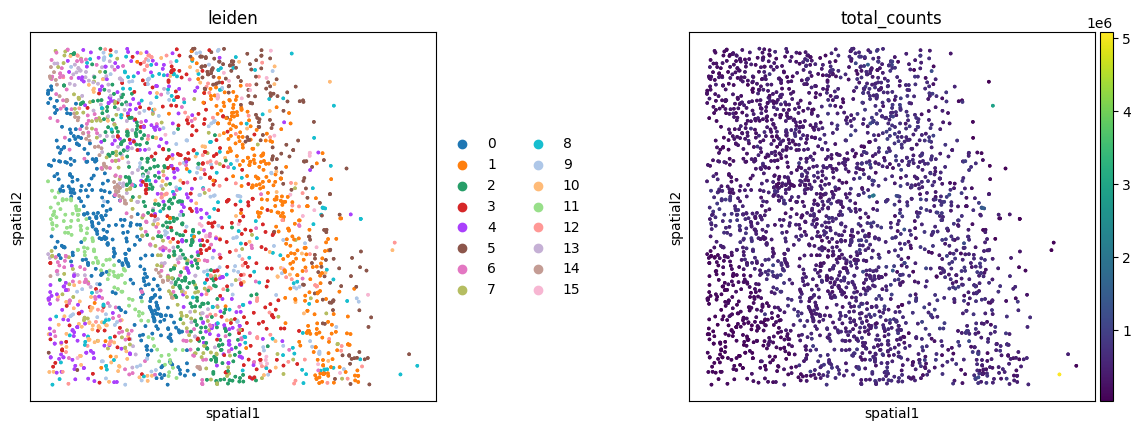

In [9]:
sq.pl.spatial_scatter(adata, color=['leiden', 'total_counts'], size=10, shape=None)

In [10]:
# remove MT genes
non_mito_genes_list = [name for name in adata.var_names if not name.startswith('mt-')]
adata = adata[:, non_mito_genes_list]

In [11]:
adata

View of AnnData object with n_obs × n_vars = 2764 × 28
    obs: 'x', 'y', 'z', 'n_counts', 'leiden', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'leiden', 'leiden_colors', 'moranI', 'neighbors', 'spatial_neighbors', 'umap'
    obsm: 'X_umap', 'spatial'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [12]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [13]:
sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=True)
sq.gr.spatial_autocorr(adata, mode="moran", 
                       n_perms=100, n_jobs=10, 
                       genes=adata.var_names)

100%|██████████| 100/100 [00:09<00:00, 10.90/s]


In [14]:
adata.uns['moranI']

I  pval_norm  var_norm  pval_z_sim  pval_sim   var_sim  \
Npy      0.859645        0.0  0.000125         0.0  0.009901  0.000247   
Slc17a7  0.803979        0.0  0.000125         0.0  0.009901  0.000288   
Pvalb    0.801085        0.0  0.000125         0.0  0.009901  0.000258   
Egr1     0.790521        0.0  0.000125         0.0  0.009901  0.000241   
Vip      0.742309        0.0  0.000125         0.0  0.009901  0.000215   
Sst      0.737376        0.0  0.000125         0.0  0.009901  0.000195   
Mbp      0.728221        0.0  0.000125         0.0  0.009901  0.000306   
Pcp4     0.728157        0.0  0.000125         0.0  0.009901  0.000277   
Flt1     0.695951        0.0  0.000125         0.0  0.009901  0.000316   
Mgp      0.650113        0.0  0.000125         0.0  0.009901  0.000211   
Cck      0.625905        0.0  0.000125         0.0  0.009901  0.000221   
Calb2    0.601412        0.0  0.000125         0.0  0.009901  0.000271   
Plcxd2   0.596724        0.0  0.000125         0.0  0.009901  0.000221   
Fos      0.587616        0.0  0.000125         0.0  0.009901  0.000181   
Prok2    0.581276        0.0  0.000125         0.0  0.009901  0.000230   
Cux2     0.579046        0.0  0.000125         0.0  0.009901  0.000259   
Bdnf     0.519565        0.0  0.000125         0.0  0.009901  0.000188   
Rasgrf2  0.499826        0.0  0.000125         0.0  0.009901  0.000195   
Rorb     0.447206        0.0  0.000125         0.0  0.009901  0.000193   
Reln     0.399361        0.0  0.000125         0.0  0.009901  0.000156   
Egr2     0.392308        0.0  0.000125         0.0  0.009901  0.000177   
Ctgf     0.383820        0.0  0.000125         0.0  0.009901  0.000150   
Gad1     0.377618        0.0  0.000125         0.0  0.009901  0.000176   
Sema3e   0.332108        0.0  0.000125         0.0  0.009901  0.000209   
Sulf2    0.281313        0.0  0.000125         0.0  0.009901  0.000118   
Gja1     0.255674        0.0  0.000125         0.0  0.009901  0.000115   
Ctss     0.223947        0.0  0.000125         0.0  0.009901  0.000092   
Nov      0.187076        0.0  0.000125         0.0  0.009901  0.000114   

         pval_norm_fdr_bh  pval_z_sim_fdr_bh  pval_sim_fdr_bh  
Npy                   0.0                0.0         0.009901  
Slc17a7               0.0                0.0         0.009901  
Pvalb                 0.0                0.0         0.009901  
Egr1                  0.0                0.0         0.009901  
Vip                   0.0                0.0         0.009901  
Sst                   0.0                0.0         0.009901  
Mbp                   0.0                0.0         0.009901  
Pcp4                  0.0                0.0         0.009901  
Flt1                  0.0                0.0         0.009901  
Mgp                   0.0                0.0         0.009901  
Cck                   0.0                0.0         0.009901  
Calb2                 0.0                0.0         0.009901  
Plcxd2                0.0                0.0         0.009901  
Fos                   0.0                0.0         0.009901  
Prok2                 0.0                0.0         0.009901  
Cux2                  0.0                0.0         0.009901  
Bdnf                  0.0                0.0         0.009901  
Rasgrf2               0.0                0.0         0.009901  
Rorb                  0.0                0.0         0.009901  
Reln                  0.0                0.0         0.009901  
Egr2                  0.0                0.0         0.009901  
Ctgf                  0.0                0.0         0.009901  
Gad1                  0.0                0.0         0.009901  
Sema3e                0.0                0.0         0.009901  
Sulf2                 0.0                0.0         0.009901  
Gja1                  0.0                0.0         0.009901  
Ctss                  0.0                0.0         0.009901  
Nov                   0.0                0.0         0.009901

In [15]:
top_autocorr = (
    adata.uns["moranI"]["I"].sort_values(ascending=False).head(25).index.tolist()
)

In [16]:
# select top 50 variable genes as reference
adata = adata[:, top_autocorr]

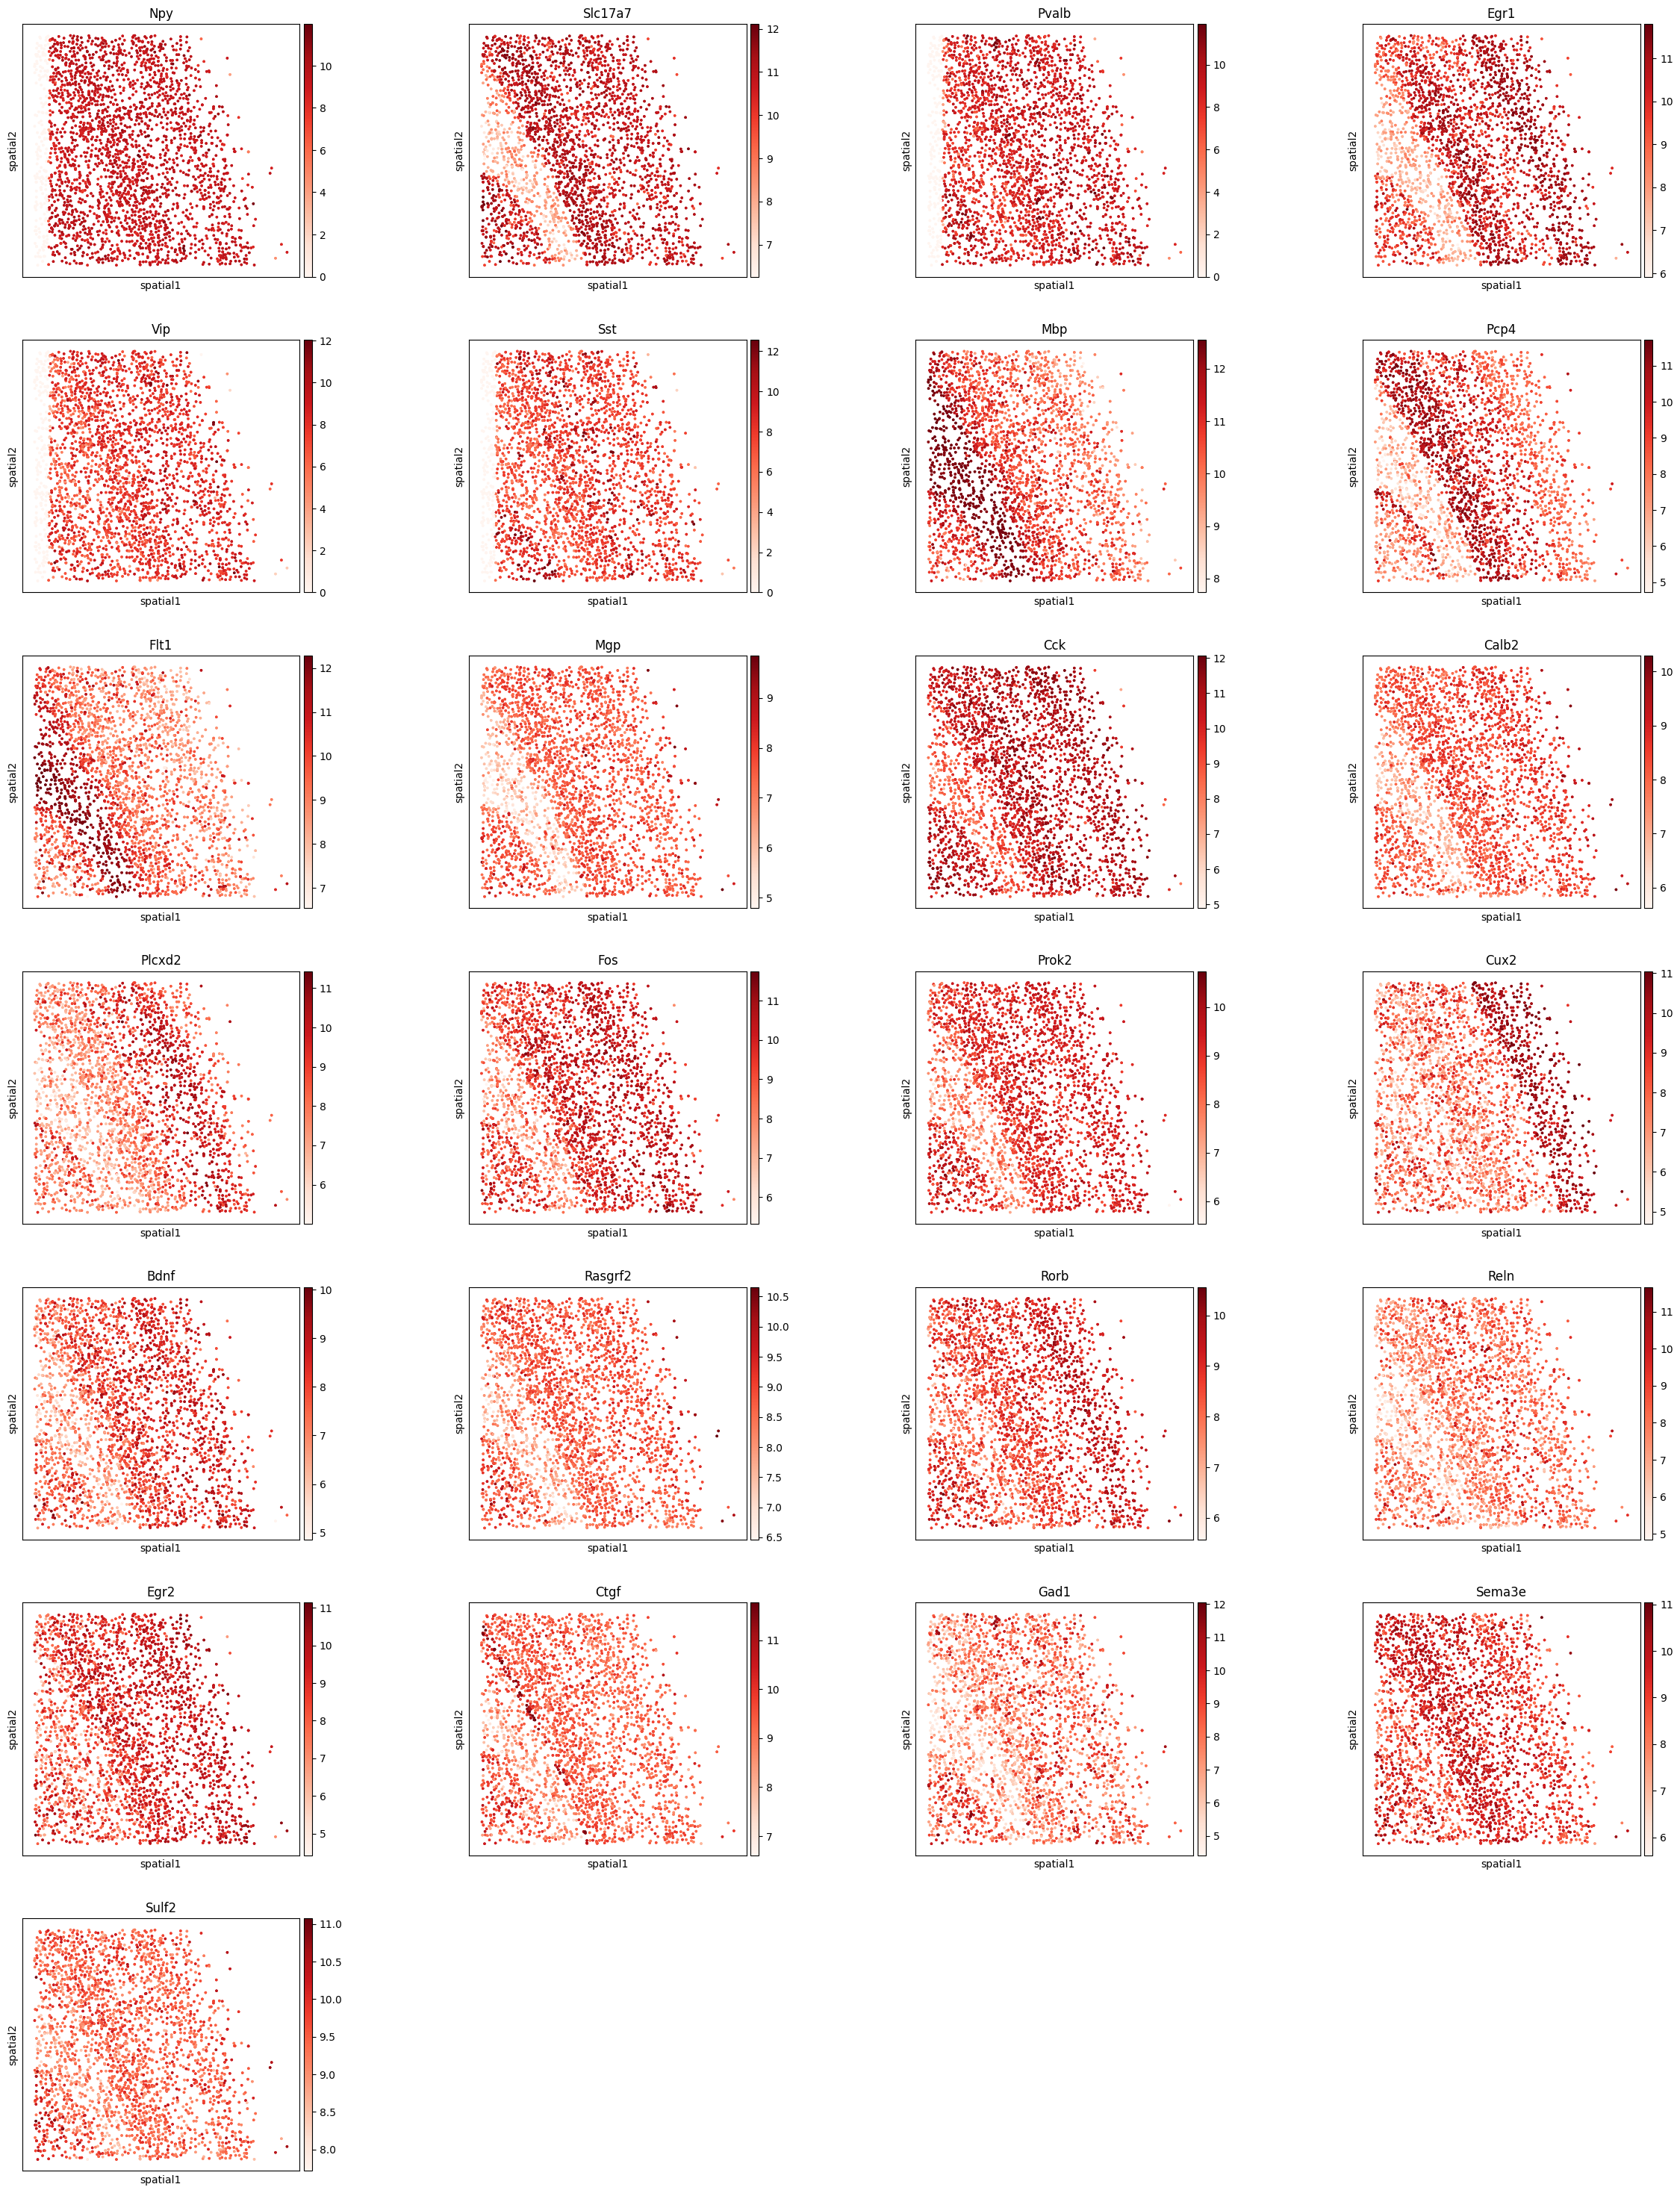

In [17]:
sq.pl.spatial_scatter(
    adata, color=top_autocorr, size=10, 
    cmap="Reds", use_raw=False, shape=None
)

In [18]:
adata

View of AnnData object with n_obs × n_vars = 2764 × 25
    obs: 'x', 'y', 'z', 'n_counts', 'leiden', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'leiden', 'leiden_colors', 'moranI', 'neighbors', 'spatial_neighbors', 'umap', 'log1p'
    obsm: 'X_umap', 'spatial'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [19]:
adata.write_h5ad('../../results/00_prepare_reference_data/49_STARmap_Wang2018_2D_zstep10_0.h5ad')